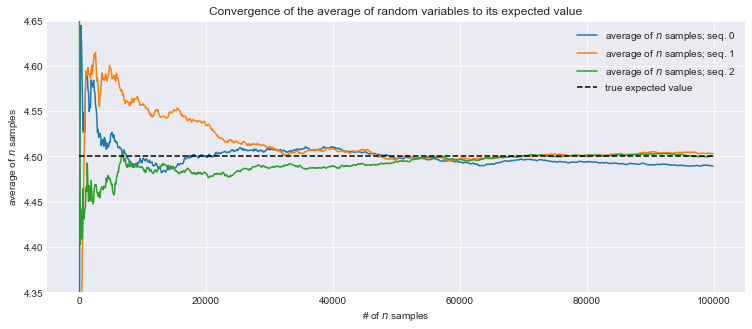

In [10]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label='average of $n$ samples; seq. %d' % k)

plt.plot(N_samples, expected_value * np.ones_like(partial_average), ls='--', label='true expected value', c='k')

plt.ylim(4.35, 4.65)
plt.title('Convergence of the average of random variables to its expected value')
plt.xlabel('# of $n$ samples')
plt.ylabel('average of $n$ samples')
plt.legend()

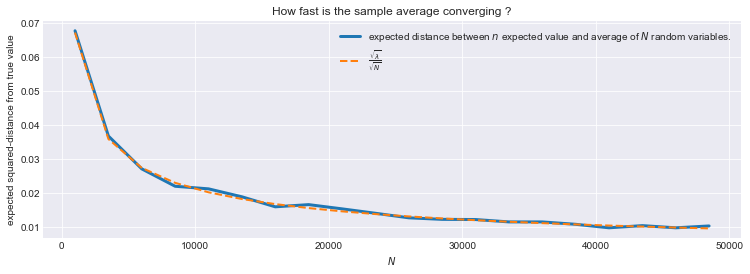

In [19]:
figsize(12.5, 4)

N_Y = 250
N_array = np.arange(1000, 50000, 2500)
D_N_results = np.zeros(len(N_array))

expected_value = lambda_ = 4.5

def D_N(n):
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.xlabel('$N$')
plt.ylabel('expected squared-distance from true value')
plt.plot(N_array, D_N_results, lw=3, 
         label='expected distance between $n$ expected value and average of $N$ random variables.')
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls='--',
        label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title('How fast is the sample average converging ?')

### The disorder of small numbers

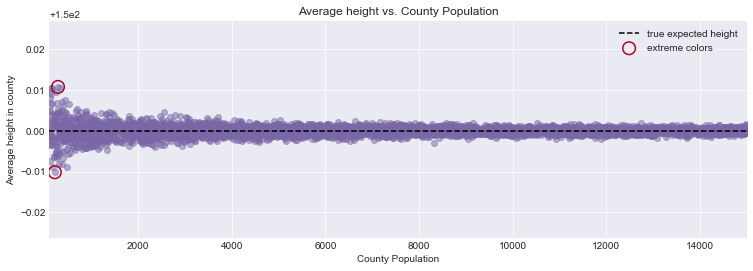

In [27]:
figsize(12.5, 4)

std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = np.random.randint
norm = np.random.normal

# generate some artificial population numbers
population = pop_generator(100, 15000, n_counties)

average_across_country = np.zeros(n_counties)
for i in range(n_counties):
    average_across_country[i] = norm(mean_height, 1. / std_height, population[i]).mean()

i_max = np.argmax(average_across_country)
i_min = np.argmin(average_across_country)

plt.scatter(population, average_across_country, alpha=0.5, c='#7A68A6')
plt.scatter([population[i_max], population[i_min]], 
            [average_across_country[i_max], average_across_country[i_min]], 
            s=160, marker='o', facecolors='none', edgecolors='#A60628', lw=1.5, label='extreme colors')
plt.xlim(100, 15000)
plt.title('Average height vs. County Population')
plt.xlabel('County Population')
plt.ylabel('Average height in county')
plt.plot([100, 15000], [150, 150], color='k', label='true expected height', ls='--')
plt.legend(scatterpoints=1)

### Kaggle' s US Census Return Rate Challenge
- classic triangular form

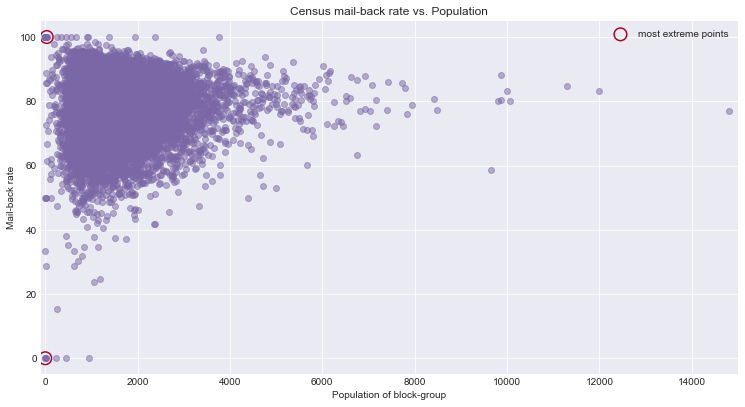

In [32]:
figsize(12.5, 6.5)

data = np.genfromtxt('./census_data.csv', skip_header=1, delimiter=',')
plt.scatter(data[:, 1], data[:, 0], alpha=0.5, c='#7A68A6')
plt.title('Census mail-back rate vs. Population')
plt.ylabel('Mail-back rate')
plt.xlabel('Population of block-group')
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)

i_max, i_min = np.argmax(data[:, 0]), np.argmin(data[:, 0])

plt.scatter([data[:, 1][i_max], data[:, 1][i_min]], 
            [data[:, 0][i_max], data[:, 0][i_min]], 
            s=160, marker='o', facecolors='none', 
            edgecolors='#A60628', lw=1.5, label='most extreme points')

plt.legend(scatterpoints=1)

### How to order Reddit submissions